In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 64

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

In [9]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

In [10]:
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))


Randomly sample the image array and take the 1000 arrays (pixels) in the dataset.

In [19]:
image_array_sample = shuffle(image_array, random_state=0)[:1000]

Cluster the sampled pixels by k-means.

In [20]:
kmeans = KMeans(n_clusters = n_colors, random_state = 893).fit(image_array_sample)

We get the labels for the whole samples.

In [22]:
labels = kmeans.predict(image_array)

In [23]:
labels[:5]

array([57, 57, 57, 57, 57], dtype=int32)

We want to compare the result with the image that uses randomply sampled colors, so we take the same number of colours randomly from the data.

In [24]:
codebook_random = shuffle(image_array, random_state = 0)[:n_colors]
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)

In [25]:
labels_random

array([55, 55, 55, ..., 52, 60, 60])

In [27]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image


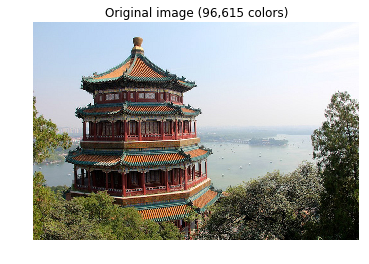

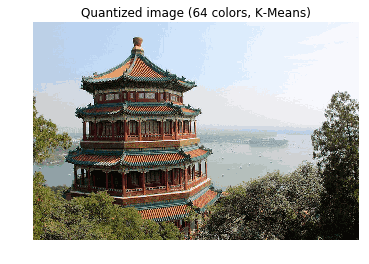

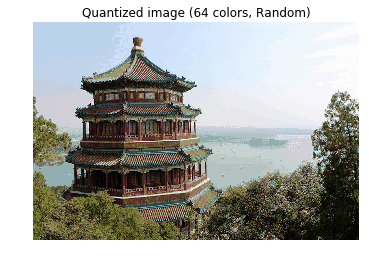

In [46]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

In [ ]:
recreate_image(kmeans.cluster_centers_, labels, w, h)

We repeat the same experiment for other pictures.

In [67]:
import matplotlib.image as mpimg

n_colors = 32
myimg1 = mpimg.imread('IMG_1363.JPG')
#myimg1 = mpimg.imread('IMG_1908.JPG')

In [68]:
myimg1 = np.array(myimg1, dtype=np.float64) / 255
w, h, d = original_shape = tuple(myimg1.shape)
assert d == 3
myimg1_array = np.reshape(myimg1, (w * h, d))


In [69]:
myimg1_array_sample = shuffle(myimg1_array, random_state=0)[:1000]
kmeans1 = KMeans(n_clusters = n_colors, random_state = 893).fit(myimg1_array_sample)

myimg1_labels = kmeans1.predict(myimg1_array)

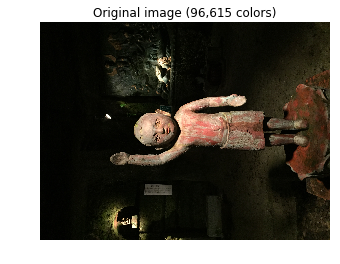

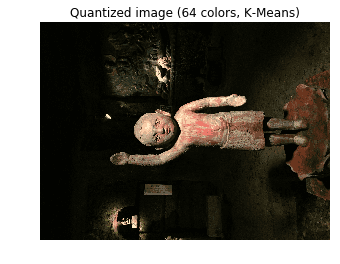

In [70]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(myimg1)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans1.cluster_centers_, myimg1_labels, w, h))


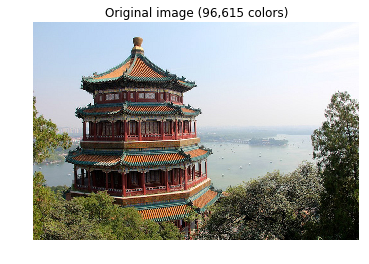

In [5]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)